# 🌊 Titanic Dataset (Simplified Version) — Project Overview

## 🧩 Story of the Dataset
This simplified Titanic dataset contains essential passenger information from the tragic 1912 Titanic disaster.  
Each row represents a passenger, including their demographic attributes and travel details.  
Our mission is to analyze these features and build a machine learning model to predict passenger survival.

---

## 🎯 Problem Type
This project is a **binary classification** task.  
We aim to predict whether each passenger survived based on their available information.

- `0` → Did **not** survive ❌  
- `1` → **Survived** ✅  

---

## 🎯 Target Variable
### **`survived`**
This is the outcome we want our model to predict.  
It represents whether a passenger lived or died during the Titanic disaster.

---

# 📊 Feature Descriptions

### 👤 Passenger Information
- **`name`** — Full name of the passenger  
  - Can be used to extract titles (Mr, Mrs, Miss, Master, etc.)

- **`sex`** — Gender of the passenger  
  - One of the strongest predictors of survival  

---

### 🧒 Demographic Features
- **`age`** — Age in years  
  - May contain missing values  
  - Useful for understanding survival patterns among children, adults, and the elderly  

---

### 👨‍👩‍👧 Family-Related Features
- **`sibsp`** — Number of siblings/spouses aboard  
- **`parch`** — Number of parents/children aboard  
- These two features can be combined into a new feature like:
  - `family_size = sibsp + parch + 1`

---

### 💳 Ticket & Travel Information
- **`pclass`** — Passenger class (1st, 2nd, 3rd)  
  - Indicates ticket class and is strongly related to socioeconomic status  

- **`fare`** — Ticket price paid  
  - Often correlated with passenger class and survival rate  

---

## 🚀 Project Goal
Use the simplified passenger data to build a machine learning model capable of predicting survival with the highest possible accuracy.

Even though this dataset contains fewer features than the original Kaggle version, we will still perform:
- Data exploration  
- Visualization  
- Feature engineering  
- Model training and optimization  

to achieve the best results possible.

In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split , KFold , cross_val_score , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
# Reading data from a CSV file and displaying all information
data = pd.read_csv('titanic.csv')
# Create a new feature 'title' by extracting titles from the 'name' column
data['title'] = data['name'].str.extract(r',\s*([A-Za-z]+)\.',expand=True)
# Create a new feature 'FamilySize' by combining 'sibsp' (siblings/spouses) and 'parch' (parents/children)
data['family_size'] = data['sibsp'] + data['parch'] + 1
# Drop the original 'sibsp' and 'parch' columns since their information is now captured in 'FamilySize'
data = data.drop(['sibsp','parch'],axis=1)
pd.set_option('display.width',1000)
print(data.head(5).round(2),'\n')       # Display the first 5 rows of the dataset
print(data.shape,'\n')                  # Display the number of rows and columns in the dataset
print(data.describe().round(2),'\n')    # Show a statistical summary of all numerical columns (count, mean, std, min, max, etc.)
print(data.groupby('survived').size())  # Grouping data by target to check distribution
print(data.dtypes,'\n')                 # Printing the data types of all columns to understand which features are numeric or categorical
print(data.isnull().sum(),'\n')         # Checking for missing values in each column to identify where data cleaning is needed
for col in data.columns:                # Displaying the number of unique values in every column to analyze feature variability and detect categorical features
    print(col,data[col].nunique())

   survived  pclass                                               name     sex   age   fare title  family_size
0         0       3                            Braund, Mr. Owen Harris    male  22.0   7.25    Mr            2
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  71.28   Mrs            2
2         1       3                             Heikkinen, Miss. Laina  female  26.0   7.92  Miss            1
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  53.10   Mrs            2
4         0       3                           Allen, Mr. William Henry    male  35.0   8.05    Mr            1 

(714, 8) 

       survived  pclass     age    fare  family_size
count    714.00  714.00  714.00  714.00       714.00
mean       0.41    2.24   29.70   34.69         1.94
std        0.49    0.84   14.53   52.92         1.48
min        0.00    1.00    0.42    0.00         1.00
25%        0.00    1.00   20.12    8.05         1.00
50%

# 🎨 Data Visualization Roadmap — Titanic Dataset

## 1️⃣ Histogram Plots 📊
- Used to explore the **distribution of numeric features** like `age` or `fare`.
- Helps to identify skewness, gaps, or unusual values in the data.
- Example: `plt.hist()` or `sns.histplot()`

---

## 2️⃣ Density Plots
- Shows the **smoothed distribution** of numeric variables.
- Useful for comparing distributions between different target classes.

---

## 3️⃣ Box Plots 📦
- Visualizes the **median, quartiles, and outliers** of numeric features.
- Helps to detect **outliers** and differences in distributions across target classes.

---

## 4️⃣ Scatter Plots
- Displays relationships between **two numeric features**.
- Can highlight trends, clusters, or correlations.
- Useful for visualizing `age` vs `fare` or other feature interactions.

---

## 5️⃣ Heatmap
- Visualizes the **correlation matrix** between numeric features.
- Helps to detect strong positive/negative correlations and feature redundancy.
- Example: `sns.heatmap(data.corr(), annot=True, cmap='coolwarm')`

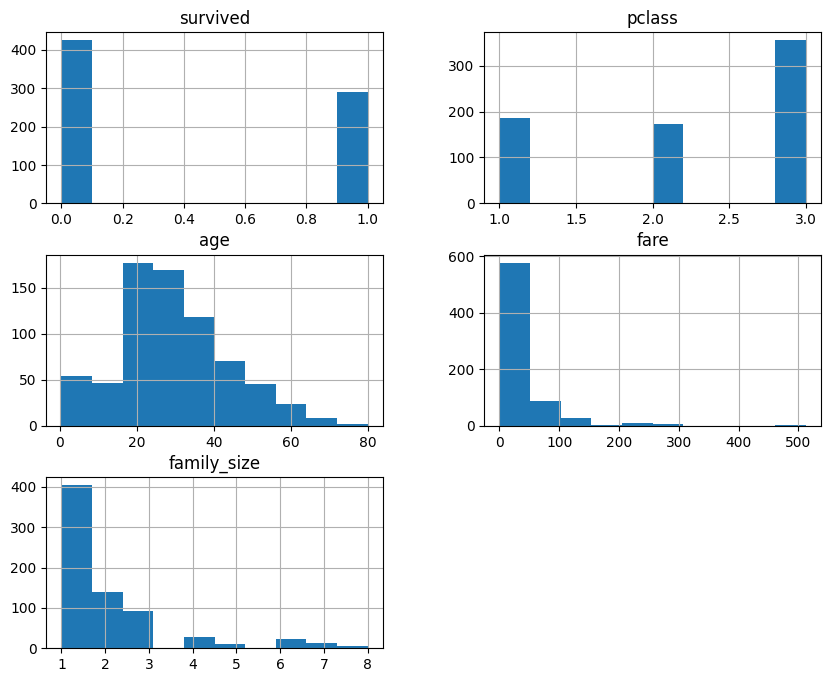

In [3]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64','float64'])
# Histogram
numeric_cols.hist(figsize=(10,8))
plt.show()

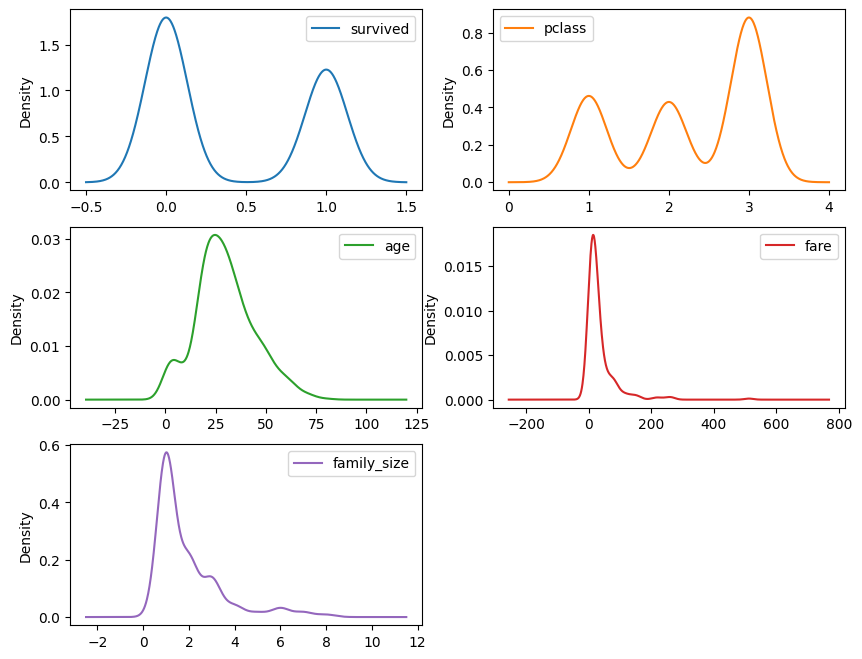

In [4]:
# Density
numeric_cols.plot(kind='density',subplots=True,layout=(3,2),sharex=False,figsize=(10,8))
plt.show()

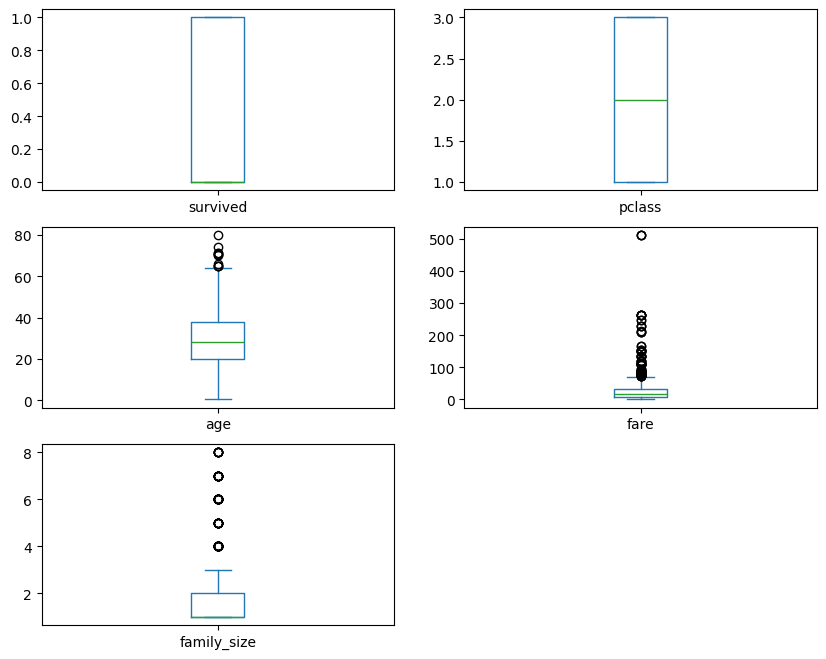

In [5]:
# Boxplot
numeric_cols.plot(kind='box',subplots=True,layout=(3,2),sharex=False,figsize=(10,8))
plt.show()

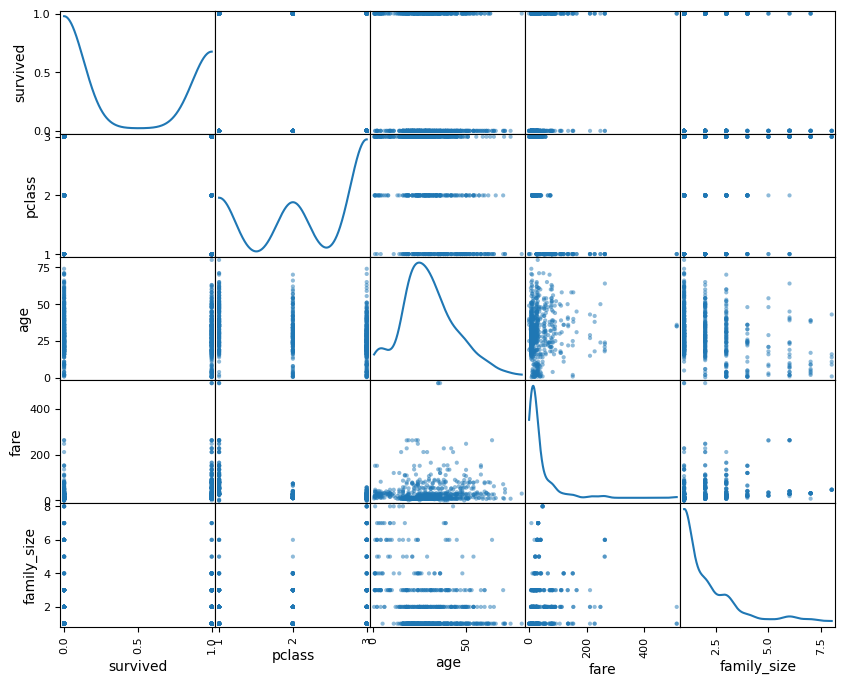

In [6]:
# ScatterMatrix
pd.plotting.scatter_matrix(numeric_cols,figsize=(10,8),diagonal='kde',alpha=0.5)
plt.show()

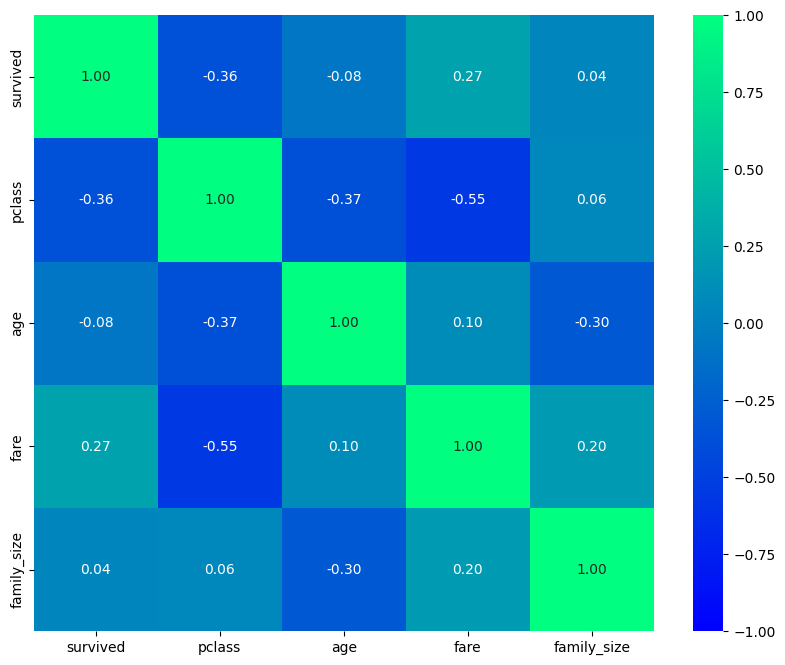

In [7]:
# Hitmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(),vmin=-1,vmax=1,cmap='winter',annot=True,fmt='.2f')
plt.show()

# 📊 Data Distribution & Correlation Analysis Summary

## 🔹 1. Distribution of Numeric Features  
- The numerical features in the dataset follow **roughly normal-like distributions**,  
  but **none of them are perfectly Gaussian**.  
- Most distributions show **noticeable skewness** (left or right lean), meaning:  
  - Data is not centered symmetrically.  
  - Some values stretch toward one side, forming a “tail”.  
- Features like **survived** and **pclass** are **categorical/ordinal**,  
  so skewness is expected and *not a problem* for them.

---

## 🔹 2. Presence of Outliers  
- A significant number of **outliers** were detected in several numeric columns.  
- These outliers cause:  
  - Distorted distributions  
  - Increased variance  
  - Potential negative impact on model performance  
- Handling them (removal, clipping, winsorizing, or transformation)  
  may improve model accuracy.

---

## 🔹 3. Correlation Between Features  
- Most features show **very weak or near-zero correlation** with each other.  
- A few feature pairs have **low negative correlation** (when one increases, the other tends to decrease slightly).  
- No strong linear relationships were observed,  
  meaning feature interactions might matter more than linear dependencies.

---

---

# 👥 Categorical Feature Analysis Plan

We are going to analyze the main categorical features in the Titanic dataset to understand their distribution and relationship with survival.  

- **Sex**: We will count how many passengers are male and female, then calculate survival rates for each group.  
- **Pclass**: We will examine the number of passengers in each class and see how class affects survival.  
- **Survived**: We will look at the overall distribution of survivors and non-survivors.  
- **Title**: This feature represents the passenger's title (Mr, Mrs, Miss, Master, etc.) and provides valuable social and demographic information, such as approximate age, gender, and social status. Analyzing titles helps us understand patterns related to survival.

This analysis will help us understand **categorical patterns** in the data and guide feature engineering for modeling.  

In [8]:
# Count how many passengers are male and female
print(data['sex'].value_counts(),'\n')
# Count the number of passengers in each Pclass
print(data['pclass'].value_counts(),'\n')
# Count the distribution of the target (survived)
print(data['survived'].value_counts(),'\n')
# Calculate survival rate for each gender
print(data.groupby('sex')['survived'].mean().round(2),'\n')
# Calculate survival rate for each passenger class
print(data.groupby('pclass')['survived'].mean().round(2),'\n')
# Count the occurrences of each title in the 'title' column
print(data['title'].value_counts(),'\n')
# Calculate survival rate for each title group
print(data.groupby('title')['survived'].mean().round(2))

sex
male      453
female    261
Name: count, dtype: int64 

pclass
3    355
1    186
2    173
Name: count, dtype: int64 

survived
0    424
1    290
Name: count, dtype: int64 

sex
female    0.75
male      0.21
Name: survived, dtype: float64 

pclass
1    0.66
2    0.48
3    0.24
Name: survived, dtype: float64 

title
Mr          398
Miss        146
Mrs         108
Master       36
Rev           6
Dr            6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64 

title
Capt        0.00
Col         0.50
Don         0.00
Dr          0.50
Jonkheer    0.00
Lady        1.00
Major       0.50
Master      0.58
Miss        0.72
Mlle        1.00
Mme         1.00
Mr          0.17
Mrs         0.79
Ms          1.00
Rev         0.00
Sir         1.00
Name: survived, dtype: float64


# 🔄 One-Hot Encoding & Train/Test Split

We are preparing the dataset for modeling by transforming categorical features into a format that machine learning models can understand and by splitting the data into training and testing sets.

- **One-Hot Encoding**  
  - Converts categorical features like `sex` and `title` into binary columns.  
  - This ensures that models can work with numeric inputs and capture important patterns without losing information.

- **Train/Test Split**  
  - Divides the dataset into training and testing sets to evaluate model performance on unseen data.  
  - Using a fixed `random_state` ensures reproducibility.  
  - Combining One-Hot Encoded features with numeric columns like `age`, `fare`, and `FamilySize` produces the final feature matrices for both training and testing.

This approach ensures that all features are properly prepared, allowing the model to learn meaningful patterns and be evaluated reliably.

In [9]:
# ----- Basic setting -----
random_state = 7
kfold = KFold(n_splits=10,shuffle=True,random_state=random_state)
scoring = 'accuracy'
# --------------------------
# ===== Separate X and y =====
# With the title feature, the name feature is no longer useful and actually just causes a disruption.
X = data.drop(columns=['survived','name'])
Y = data['survived']
# ===== Train/Test Split =====
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.22,random_state=random_state)
# ===== One-Hot Encoding =====
cat_col_str = ['sex','title']
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train[cat_col_str])
# ===== Transform Train and Test =====
x_train_encoder = encoder.transform(x_train[cat_col_str]).toarray()
x_test_encoder = encoder.transform(x_test[cat_col_str]).toarray()
# ===== Combine with Numeric Columns =====
cat_col_num = X.drop(columns=cat_col_str).columns.tolist()
num_train = x_train[cat_col_num].to_numpy()
num_test = x_test[cat_col_num].to_numpy()

x_train_final = np.hstack([x_train_encoder,num_train])
x_test_final = np.hstack([x_test_encoder,num_test])

# 🚀 Spot Check & Model Unpacking for Titanic Project

Before diving deep into hyperparameter tuning or ensembles, it's good to perform a **quick spot check** with basic models. This helps us understand which algorithms work reasonably well on our dataset and identify any glaring issues early.

## 🔹 Basic Models for Spot Check
We will start with these commonly used models for classification:

- **Logistic Regression (LR)**
- **Linear Discriminant Analysis (LDA)**
- **K-Nearest Neighbors (KNN)**
- **Gaussian Naive Bayes (NB)**
- **Decision Tree / CART** 🌳
- **Support Vector Machine (SVM)**

## 🔹 Purpose of Spot Check
- Quickly evaluate the **baseline performance** of multiple models.  
- Identify **strengths and weaknesses** before investing time in tuning.  
- Compare **simple vs more complex models** on the same dataset.  

## 🔹 Unpacking Models
- Train each model on **training data**.   
- This gives a **clear overview** of which models perform well and which require more attention.  

✨ After this step, you can confidently select a few promising models for **hyperparameter tuning, feature engineering, or ensemble methods**.

Name : LR , Accuracy : 81.67 % , STD : 4.74
Name : LDA , Accuracy : 82.02 % , STD : 4.05
Name : KNN , Accuracy : 72.85 % , STD : 5.18
Name : NB , Accuracy : 77.17 % , STD : 5.19
Name : CART , Accuracy : 77.18 % , STD : 8.98
Name : SVM , Accuracy : 66.73 % , STD : 3.45


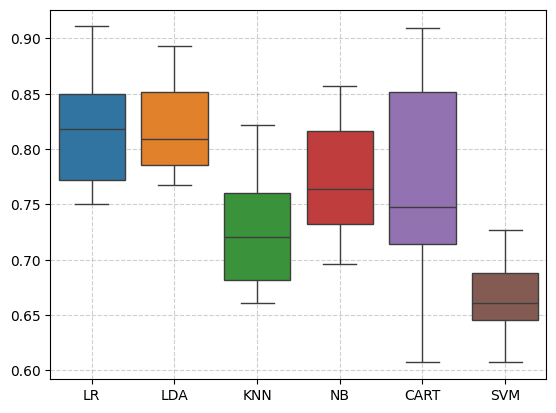

In [10]:
models = []
models.append(('LR',LogisticRegression(max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
result = []
names = []
for name , model in models:
    cv_result = cross_val_score(model,x_train_final,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(f'Name : {name} , Accuracy : {cv_result.mean()*100:.2f} % , STD : {cv_result.std()*100:.2f}')
result_df = pd.DataFrame(result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

# 🧱 Pipeline & Standardization (Why We Use Them)

## ⚡ Why Pipeline?
- Combines preprocessing + model in one clean workflow.  
- Prevents **data leakage** by fitting scalers only on training data.  
- Makes experiments cleaner, reproducible, and less error-prone.

## 📏 Why StandardScaler?
- Models like **SVM** and **KNN** depend heavily on feature scale.  
- Scaling sets all numeric features to mean=0 and std=1.  
- Helps models converge better and perform more consistently.

## 💡 Note on SVM
- SVM is *very* sensitive to feature magnitude.  
- After scaling, its accuracy improved dramatically — showing why standardization is required.

✔️ Pipeline + StandardScaler = safer, cleaner, and more accurate modeling.

Name : LR , Accuracy : 82.03 % , STD : 4.11
Name : LDA , Accuracy : 82.02 % , STD : 4.05
Name : KNN , Accuracy : 81.66 % , STD : 5.85
Name : NB , Accuracy : 65.92 % , STD : 13.29
Name : CART , Accuracy : 76.98 % , STD : 8.23
Name : SVM , Accuracy : 82.38 % , STD : 3.65


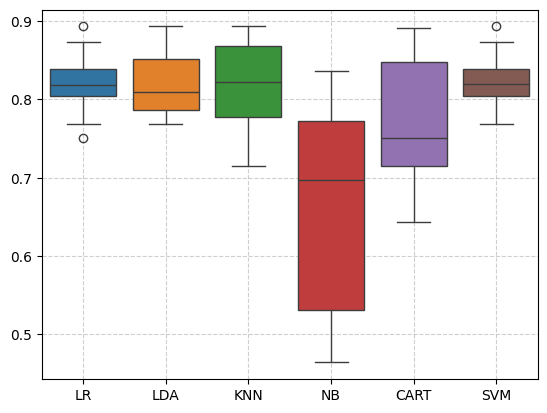

In [11]:
scaled_result = []
for name , model in models:
    pipeline = Pipeline([
        ('Scaled',StandardScaler()),
        ('Classifier',model)
    ])
    cv_result = cross_val_score(pipeline,x_train_final,y_train,cv=kfold,scoring=scoring)
    scaled_result.append(cv_result)
    print(f'Name : {name} , Accuracy : {cv_result.mean()*100:.2f} % , STD : {cv_result.std()*100:.2f}')
result_df = pd.DataFrame(scaled_result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

# 🧪 Summary After Standardization

After applying StandardScaler inside a pipeline, we re-evaluated all classical models. Some benefited significantly from scaling, while others showed little improvement.

### ✅ Improved Models
- **SVM** – Strong improvement because it is very sensitive to feature scale. After scaling, the margin becomes more meaningful and the model stabilizes.  
- **KNN** – Distance-based model, so scaling helps distances behave correctly across features. Accuracy increased noticeably.  
- **Logistic Regression** – Works better when all features contribute equally; scaling resulted in a cleaner optimization surface.

### ⚠️ Limited or Negative Effect
- **LDA** – Performance stayed almost the same because LDA internally handles scaling through covariance structure.  
- **CART** – Decision Trees don’t rely on distances or gradients; scaling rarely affects them.  
- **Naive Bayes** – Became unstable since scaling modifies variance relationships that NB depends on. Performance dropped significantly.

### 🎯 Best Candidates for Hyperparameter Tuning
- **SVM** → biggest improvement; strong potential  
- **Logistic Regression** → consistent and stable  
- **KNN** → now competitive after scaling

These three models deserve deeper tuning and evaluation.

---

---

# 🌲 Ensemble Models to Test Next

Before choosing our final model for tuning, we will evaluate four powerful ensemble algorithms. Ensembles often outperform classical models, even without tuning, because they combine many weak or moderate learners into a strong predictor.

### 🌳 Random Forest
Builds many decision trees on random subsets of data and features, then aggregates their votes.  
Stable, robust to noise, and works well on mixed datasets. It reduces overfitting by averaging many trees.

### ✨ Extra Trees (Extremely Randomized Trees)
Similar to Random Forest, but randomness is even higher:  
split points and selected features are more random.  
This makes it faster and sometimes more stable. Great when speed matters.

### 🔥 Gradient Boosting
Builds trees **sequentially**, where each new tree tries to correct the mistakes of the previous one.  
This step-by-step improvement often leads to high accuracy.  
Very powerful, especially on structured datasets like Titanic.

### ⚡ AdaBoost
Gives more weight to samples that were misclassified earlier.  
Each new model focuses on the “hard” points.  
Light, fast, and surprisingly effective, especially when patterns are clear.

Name : RF , Accuracy : 82.74 % , STD : 7.46
Name : ET , Accuracy : 81.31 % , STD : 7.18
Name : AB , Accuracy : 80.40 % , STD : 4.94
Name : SGB , Accuracy : 82.73 % , STD : 6.49


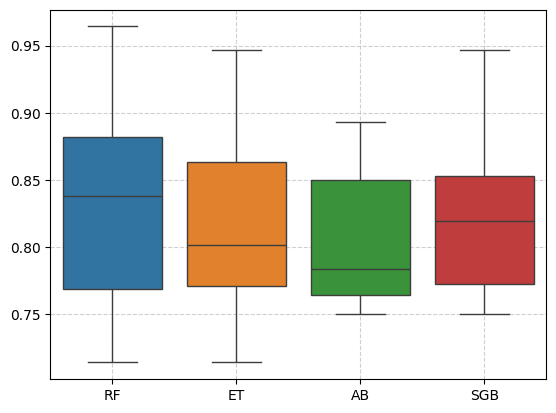

In [12]:
ensemble_models = []
ensemble_models.append(('RF',RandomForestClassifier(random_state=random_state)))
ensemble_models.append(('ET',ExtraTreesClassifier(random_state=random_state)))
ensemble_models.append(('AB',AdaBoostClassifier(random_state=random_state)))
ensemble_models.append(('SGB',GradientBoostingClassifier(random_state=random_state)))
ensemble_result = []
ensemble_names = []
for name , model in ensemble_models:
    ensemble_pipeline = Pipeline([
        ('Scaled',StandardScaler()),
        ('Classifier',model)
    ])
    cv_result = cross_val_score(ensemble_pipeline,x_train_final,y_train,cv=kfold,scoring=scoring)
    ensemble_result.append(cv_result)
    ensemble_names.append(name)
    print(f'Name : {name} , Accuracy : {cv_result.mean()*100:.2f} % , STD : {cv_result.std()*100:.2f}')
result_df = pd.DataFrame(ensemble_result,index=ensemble_names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

# 🎯 Hyperparameter Tuning for Top 4 Models

We selected these four models for hyperparameter optimization because they showed the strongest performance in our baseline and ensemble evaluations:

1. **SVM (Support Vector Machine)**  
   - Chosen because it improved significantly after scaling and is very sensitive to feature distributions.  
   - Key Hyperparameters for GridSearch:  
     - **C** → controls regularization strength  
     - **kernel** → choice of linear, polynomial, or RBF functions  
     - **gamma** → influence of each data point  

2. **Logistic Regression (LR)**  
   - Chosen for its simplicity, interpretability, and stable performance after scaling.  
   - Key Hyperparameters:  
     - **penalty** → regularization type (L1, L2, ElasticNet)  
     - **C** → regularization strength  
     - **solver** → optimization algorithm  

3. **Random Forest (RF)**  
   - Chosen for its robustness, high accuracy, and ability to handle mixed data types.  
   - Key Hyperparameters:  
     - **n_estimators** → number of trees  
     - **max_depth** → maximum depth of each tree  
     - **max_features** → number of features considered for splits  
     - **min_samples_leaf** → minimum samples per leaf  

4. **Gradient Boosting (SGB)**  
   - Chosen for its sequential learning approach and potential for high accuracy.  
   - Key Hyperparameters:  
     - **n_estimators** → number of sequential trees  
     - **learning_rate** → step size for each tree  
     - **max_depth** → maximum depth per tree  
     - **subsample** → fraction of data used for each tree  

---

**Summary:**  
These four models represent a combination of **top-performing classical models** (SVM, LR) and **strong ensemble models** (RF, SGB). Hyperparameter tuning on these ensures we target the most promising algorithms for final evaluation and potential deployment.

In [17]:
# Build an SVM pipeline where scaling is applied before model training
svm_pipe = Pipeline([
    ('Scaled',StandardScaler()),
    ('SVM',SVC())
])
# Define the hyperparameter search space for SVM
# - C controls regularization strength
# - kernel determines the decision boundary type
# - gamma affects the influence range of support vectors (for rbf/poly)
svm_param_grid = {
    'SVM__C' : [0.1,1,10],
    'SVM__kernel': ['linear','rbf','poly'],
    'SVM__gamma' : [0.01,0.1,1,'auto','scale']
}
# Perform GridSearchCV to find the best SVM hyperparameters
svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=svm_param_grid,
    scoring=scoring,
    n_jobs=-1,
    cv=kfold
)
# Fit the model and display the best score and parameters
svm_grid.fit(x_train_final,y_train)
print(f'SVM - Best CV accuracy : {svm_grid.best_score_*100:.2f} %')
print(f'SVM - Best params : {svm_grid.best_params_}')

SVM - Best CV accuracy : 82.74 %
SVM - Best params : {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [18]:
# Build a Logistic Regression pipeline with scaling applied before training
lr_pipe = Pipeline([
    ('Scaled',StandardScaler()),
    ('LR',LogisticRegression(max_iter=1000))
])
# Define the hyperparameter search space for Logistic Regression
# - C controls regularization strength
# - penalty defines the type of regularization (l1/l2)
# - solver determines the optimization algorithm (not all solvers support all penalties)
lr_param_grid = {
    'LR__C' : [0.01,0.1,1,10],
    'LR__penalty' : ['l1','l2'],
    'LR__solver' : ['liblinear','saga']
}
# Perform GridSearchCV to identify the best LR hyperparameters
lr_grid = GridSearchCV(
    estimator=lr_pipe,
    param_grid=lr_param_grid,
    scoring=scoring,
    n_jobs=-1,
    cv=kfold
)
# Fit model and display the best cross-validation accuracy and parameters
lr_grid.fit(x_train_final,y_train)
print(f'LogisticRegression - Best CV accuracy : {lr_grid.best_score_*100:.2f} %')
print(f'LogisticRegression - Best params : {lr_grid.best_params_}')

LogisticRegression - Best CV accuracy : 82.20 %
LogisticRegression - Best params : {'LR__C': 10, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


In [25]:
# Create a Pipeline that applies Standard Scaling followed by a Random Forest classifier
rf_pipe = Pipeline([
    ('Scaled',StandardScaler()),
    ('RF',RandomForestClassifier(random_state=random_state))
])
# Define the hyperparameter grid for Random Forest tuning
# - n_estimators: number of trees in the forest
# - max_depth: maximum depth of each tree (None means fully grown trees)
# - max_features: number of features to consider at each split
# - min_samples_leaf: minimum samples required at each leaf node
rf_param_grid = {
    'RF__n_estimators' : [100,200,300],
    'RF__max_depth' : [5,7,10,None],
    'RF__max_features' : ['sqrt','log2',0.5,None],
    'RF__min_samples_leaf' : [1,3,5,7]
}
# Run GridSearchCV to identify the best hyperparameters for Random Forest
rf_grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    scoring=scoring,
    n_jobs=-1,
    cv=kfold,
    error_score='raise'
)
# Fit the model and print best cross-validation accuracy and parameters
rf_grid.fit(x_train_final,y_train)
print(f'RandomForest - Best CV accuracy : {rf_grid.best_score_*100:.2f} %')
print(f'RandomForest - Best params : {rf_grid.best_params_}')

RandomForest - Best CV accuracy : 84.17 %
RandomForest - Best params : {'RF__max_depth': 5, 'RF__max_features': 0.5, 'RF__min_samples_leaf': 5, 'RF__n_estimators': 300}


In [26]:
# Create a Pipeline that applies Standard Scaling followed by a Gradient Boosting classifier
sgb_pipe = Pipeline([
    ('Scaled',StandardScaler()),
    ('SGB',GradientBoostingClassifier(random_state=random_state))
])
# Define the hyperparameter grid for Gradient Boosting tuning
# - n_estimators: number of boosting stages (trees)
# - learning_rate: step size shrinkage used in updates
# - max_depth: maximum depth of each tree
# - subsample: fraction of samples used for fitting each tree (controls variance)
sgb_param_grid = {
    'SGB__n_estimators' : [50,100,200,300],
    'SGB__learning_rate' : [0.01,0.05,0.1,0.2],
    'SGB__max_depth' : [3,5,7,10],
    'SGB__subsample' : [0.6,0.8,1.0]
}
# Run GridSearchCV to identify the best hyperparameters for Gradient Boosting
sgb_grid = GridSearchCV(
    estimator=sgb_pipe,
    param_grid=sgb_param_grid,
    scoring=scoring,
    n_jobs=-1,cv=kfold
)
# Fit the model and print best cross-validation accuracy and parameters
sgb_grid.fit(x_train_final,y_train)
print(f'GradientBoosting - Best CV accuracy : {sgb_grid.best_score_*100:.2f} %')
print(f'GradientBoosting - Best params : {sgb_grid.best_params_}')

GradientBoosting - Best CV accuracy : 84.18 %
GradientBoosting - Best params : {'SGB__learning_rate': 0.01, 'SGB__max_depth': 5, 'SGB__n_estimators': 200, 'SGB__subsample': 1.0}


# 🚀 Final Prediction Choice: GradientBoosting

For the final prediction phase, **GradientBoosting** is chosen as our main model. 

- **Highest Accuracy**: Among all models, GradientBoosting achieved the top cross-validation accuracy (~84.18%), slightly surpassing RandomForest.
- **Controlled Overfitting**: Unlike RandomForest, GradientBoosting builds trees sequentially and adjusts errors iteratively, which reduces overfitting while capturing complex patterns.
- **Robustness**: Performs well with both numerical and categorical features (after scaling and one-hot encoding), making it ideal for our dataset.
- **Precision in Learning**: The gradual learning process (learning_rate & n_estimators) allows fine-tuning of predictions for better generalization.

In summary, GradientBoosting balances accuracy, stability, and robustness, making it the optimal choice for final predictions. 🌟

In [28]:
sgb_pipe_final = Pipeline([
    ('Scaled',StandardScaler()),
    ('SGB',GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,max_depth=5,subsample=1.0,random_state=random_state))
])
sgb_pipe_final.fit(x_train_final,y_train)
prediction = sgb_pipe_final.predict(x_test_final)
print(f'Test Accuracy : {accuracy_score(y_test,prediction)*100:.2f} %')
print('\n Confusion Matrix \n',confusion_matrix(y_test,prediction))
print('\n Classification Report \n',classification_report(y_test,prediction))

Test Accuracy : 81.65 %

 Confusion Matrix 
 [[82  9]
 [20 47]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        91
           1       0.84      0.70      0.76        67

    accuracy                           0.82       158
   macro avg       0.82      0.80      0.81       158
weighted avg       0.82      0.82      0.81       158



# 🏁 Final Model Evaluation: GradientBoosting

After predicting on the test set, here are the key results:

- **Test Accuracy**: 81.65 % — The model generalizes reasonably well on unseen data, slightly lower than cross-validation accuracy, indicating minor overfitting.
  
- **Confusion Matrix**:  
  [[82  9]  
   [20 47]]  
  - 82 true negatives (class 0 correctly predicted)  
  - 47 true positives (class 1 correctly predicted)  
  - 9 false positives & 20 false negatives — showing the model is slightly better at predicting class 0 than class 1.
  
- **Classification Report**:  
  - **Precision**: Measures correctness of positive predictions. Class 0 → 0.80, Class 1 → 0.84  
  - **Recall**: Measures how many actual positives were captured. Class 0 → 0.90, Class 1 → 0.70  
  - **F1-Score**: Harmonic mean of precision & recall. Class 0 → 0.85, Class 1 → 0.76  
  - **Support**: Number of samples per class. Class 0 → 91, Class 1 → 67  

**Insights**:  
- The model performs slightly better on the majority class (class 0) due to class imbalance.  
- Overall metrics (accuracy, macro avg, weighted avg) are consistent with a strong predictive performance.  
- Further improvements could involve balancing classes or fine-tuning learning_rate/n_estimators. 🌟
